In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_csv("/content/drive/MyDrive/lang_data.csv")
df.head()

,text,language
0,Ship shape and Bristol fashion,English
1,Know the ropes,English
2,Graveyard shift,English
3,Milk of human kindness,English
4,Touch with a barge-pole - Wouldn't,English


In [13]:
df.dropna()
df['text'] = df['text'].astype(str)
df['language'] = df['language'].astype(str)

In [14]:
df

,text,language
0,Ship shape and Bristol fashion,English
1,Know the ropes,English
2,Graveyard shift,English
3,Milk of human kindness,English
4,Touch with a barge-pole - Wouldn't,English
...,...,...
2834,Daar’s ‘n geurtjie aan.,Afrikaans
2835,Men's evil manners live in brass; their virtue...,English
2836,Go-faster,English
2837,Red tape,English


In [16]:
# Define a list of commonly found punctuations
import collections # used for dictionaries and counters
from itertools import permutations # used to find permutations

punc = ('!', "," ,"\'" ,";" ,"\"", ".", "-" ,"?")
vowels=['a','e','i','o','u']
# Define a list of double consecutive vowels which are typically found in Dutch and Afrikaans languages
same_consecutive_vowels = ['aa','ee', 'ii', 'oo', 'uu'] 
consecutive_vowels = [''.join(p) for p in permutations(vowels,2)]
dutch_combos = ['ij']

# Create a pre-defined set of features based on the "text" column in order to allow us to characterize the string
df['word_count'] = df['text'].apply(lambda x : len(x.split()))
df['character_count'] = df['text'].apply(lambda x : len(x.replace(" ","")))
df['word_density'] = df['word_count'] / (df['character_count'] + 1)
df['punc_count'] = df['text'].apply(lambda x : len([a for a in x if a in punc]))
df['v_char_count'] = df['text'].apply(lambda x : len([a for a in x if a.casefold() == 'v']))
df['w_char_count'] = df['text'].apply(lambda x : len([a for a in x if a.casefold() == 'w']))
df['ij_char_count'] = df['text'].apply(lambda x : sum([any(d_c in a for d_c in dutch_combos) for a in x.split()]))
df['num_double_consec_vowels'] = df['text'].apply(lambda x : sum([any(c_v in a for c_v in same_consecutive_vowels) for a in x.split()]))
df['num_consec_vowels'] = df['text'].apply(lambda x : sum([any(c_v in a for c_v in consecutive_vowels) for a in x.split()]))
df['num_vowels'] = df['text'].apply(lambda x : sum([any(v in a for v in vowels) for a in x.split()]))
df['vowel_density'] = df['num_vowels']/df['word_count']
df['capitals'] = df['text'].apply(lambda comment: sum(1 for c in comment if c.isupper()))
df['caps_vs_length'] = df.apply(lambda row: float(row['capitals'])/float(row['character_count']),axis=1)
df['num_exclamation_marks'] =df['text'].apply(lambda x: x.count('!'))
df['num_question_marks'] = df['text'].apply(lambda x: x.count('?'))
df['num_punctuation'] = df['text'].apply(lambda x: sum(x.count(w) for w in punc))
df['num_unique_words'] = df['text'].apply(lambda x: len(set(w for w in x.split())))
df['num_repeated_words'] = df['text'].apply(lambda x: len([w for w in collections.Counter(x.split()).values() if w > 1]))
df['words_vs_unique'] = df['num_unique_words'] / df['word_count']
df['encode_ascii'] = np.nan
for i in range(len(df)):
    try:
        df['text'].iloc[i].encode(encoding='utf-8').decode('ascii')
    except UnicodeDecodeError:
        df['encode_ascii'].iloc[i] = 0
    else:
        df['encode_ascii'].iloc[i] = 1

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [17]:
df.groupby('language').mean().T

language,Afrikaans,English,Nederlands
word_count,10.050671,4.039961,4.494505
character_count,41.608048,16.695234,19.989011
word_density,0.234821,0.226739,0.220091
punc_count,1.435171,0.313914,0.901099
v_char_count,0.621461,0.125181,0.263736
w_char_count,0.861401,0.288878,0.384615
ij_char_count,0.000000,0.000000,0.197802
num_double_consec_vowels,1.615499,0.176697,0.747253
num_consec_vowels,2.640835,0.530573,0.835165
num_vowels,8.727273,3.713529,4.439560


In [18]:
df

,text,language,word_count,character_count,word_density,punc_count,v_char_count,w_char_count,ij_char_count,num_double_consec_vowels,num_consec_vowels,num_vowels,vowel_density,capitals,caps_vs_length,num_exclamation_marks,num_question_marks,num_punctuation,num_unique_words,num_repeated_words,words_vs_unique,encode_ascii
0,Ship shape and Bristol fashion,English,5,26,0.185185,0,0,0,0,0,1,5,1.000000,2,0.076923,0,0,0,5,0,1.000000,1.0
1,Know the ropes,English,3,12,0.230769,0,0,1,0,0,0,3,1.000000,1,0.083333,0,0,0,3,0,1.000000,1.0
2,Graveyard shift,English,2,14,0.133333,0,1,0,0,0,0,2,1.000000,1,0.071429,0,0,0,2,0,1.000000,1.0
3,Milk of human kindness,English,4,19,0.200000,0,0,0,0,0,0,4,1.000000,1,0.052632,0,0,0,4,0,1.000000,1.0
4,Touch with a barge-pole - Wouldn't,English,6,29,0.200000,3,0,2,0,0,2,5,0.833333,2,0.068966,0,0,3,6,0,1.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2834,Daar’s ‘n geurtjie aan.,Afrikaans,4,20,0.190476,1,0,0,0,2,1,3,0.750000,1,0.050000,0,0,1,4,0,1.000000,0.0
2835,Men's evil manners live in brass; their virtue...,English,12,54,0.218182,2,3,3,0,0,2,12,1.000000,1,0.018519,0,0,2,11,1,0.916667,1.0
2836,Go-faster,English,1,9,0.100000,1,0,0,0,0,0,1,1.000000,1,0.111111,0,0,1,1,0,1.000000,1.0
2837,Red tape,English,2,7,0.250000,0,0,0,0,0,0,2,1.000000,1,0.142857,0,0,0,2,0,1.000000,1.0


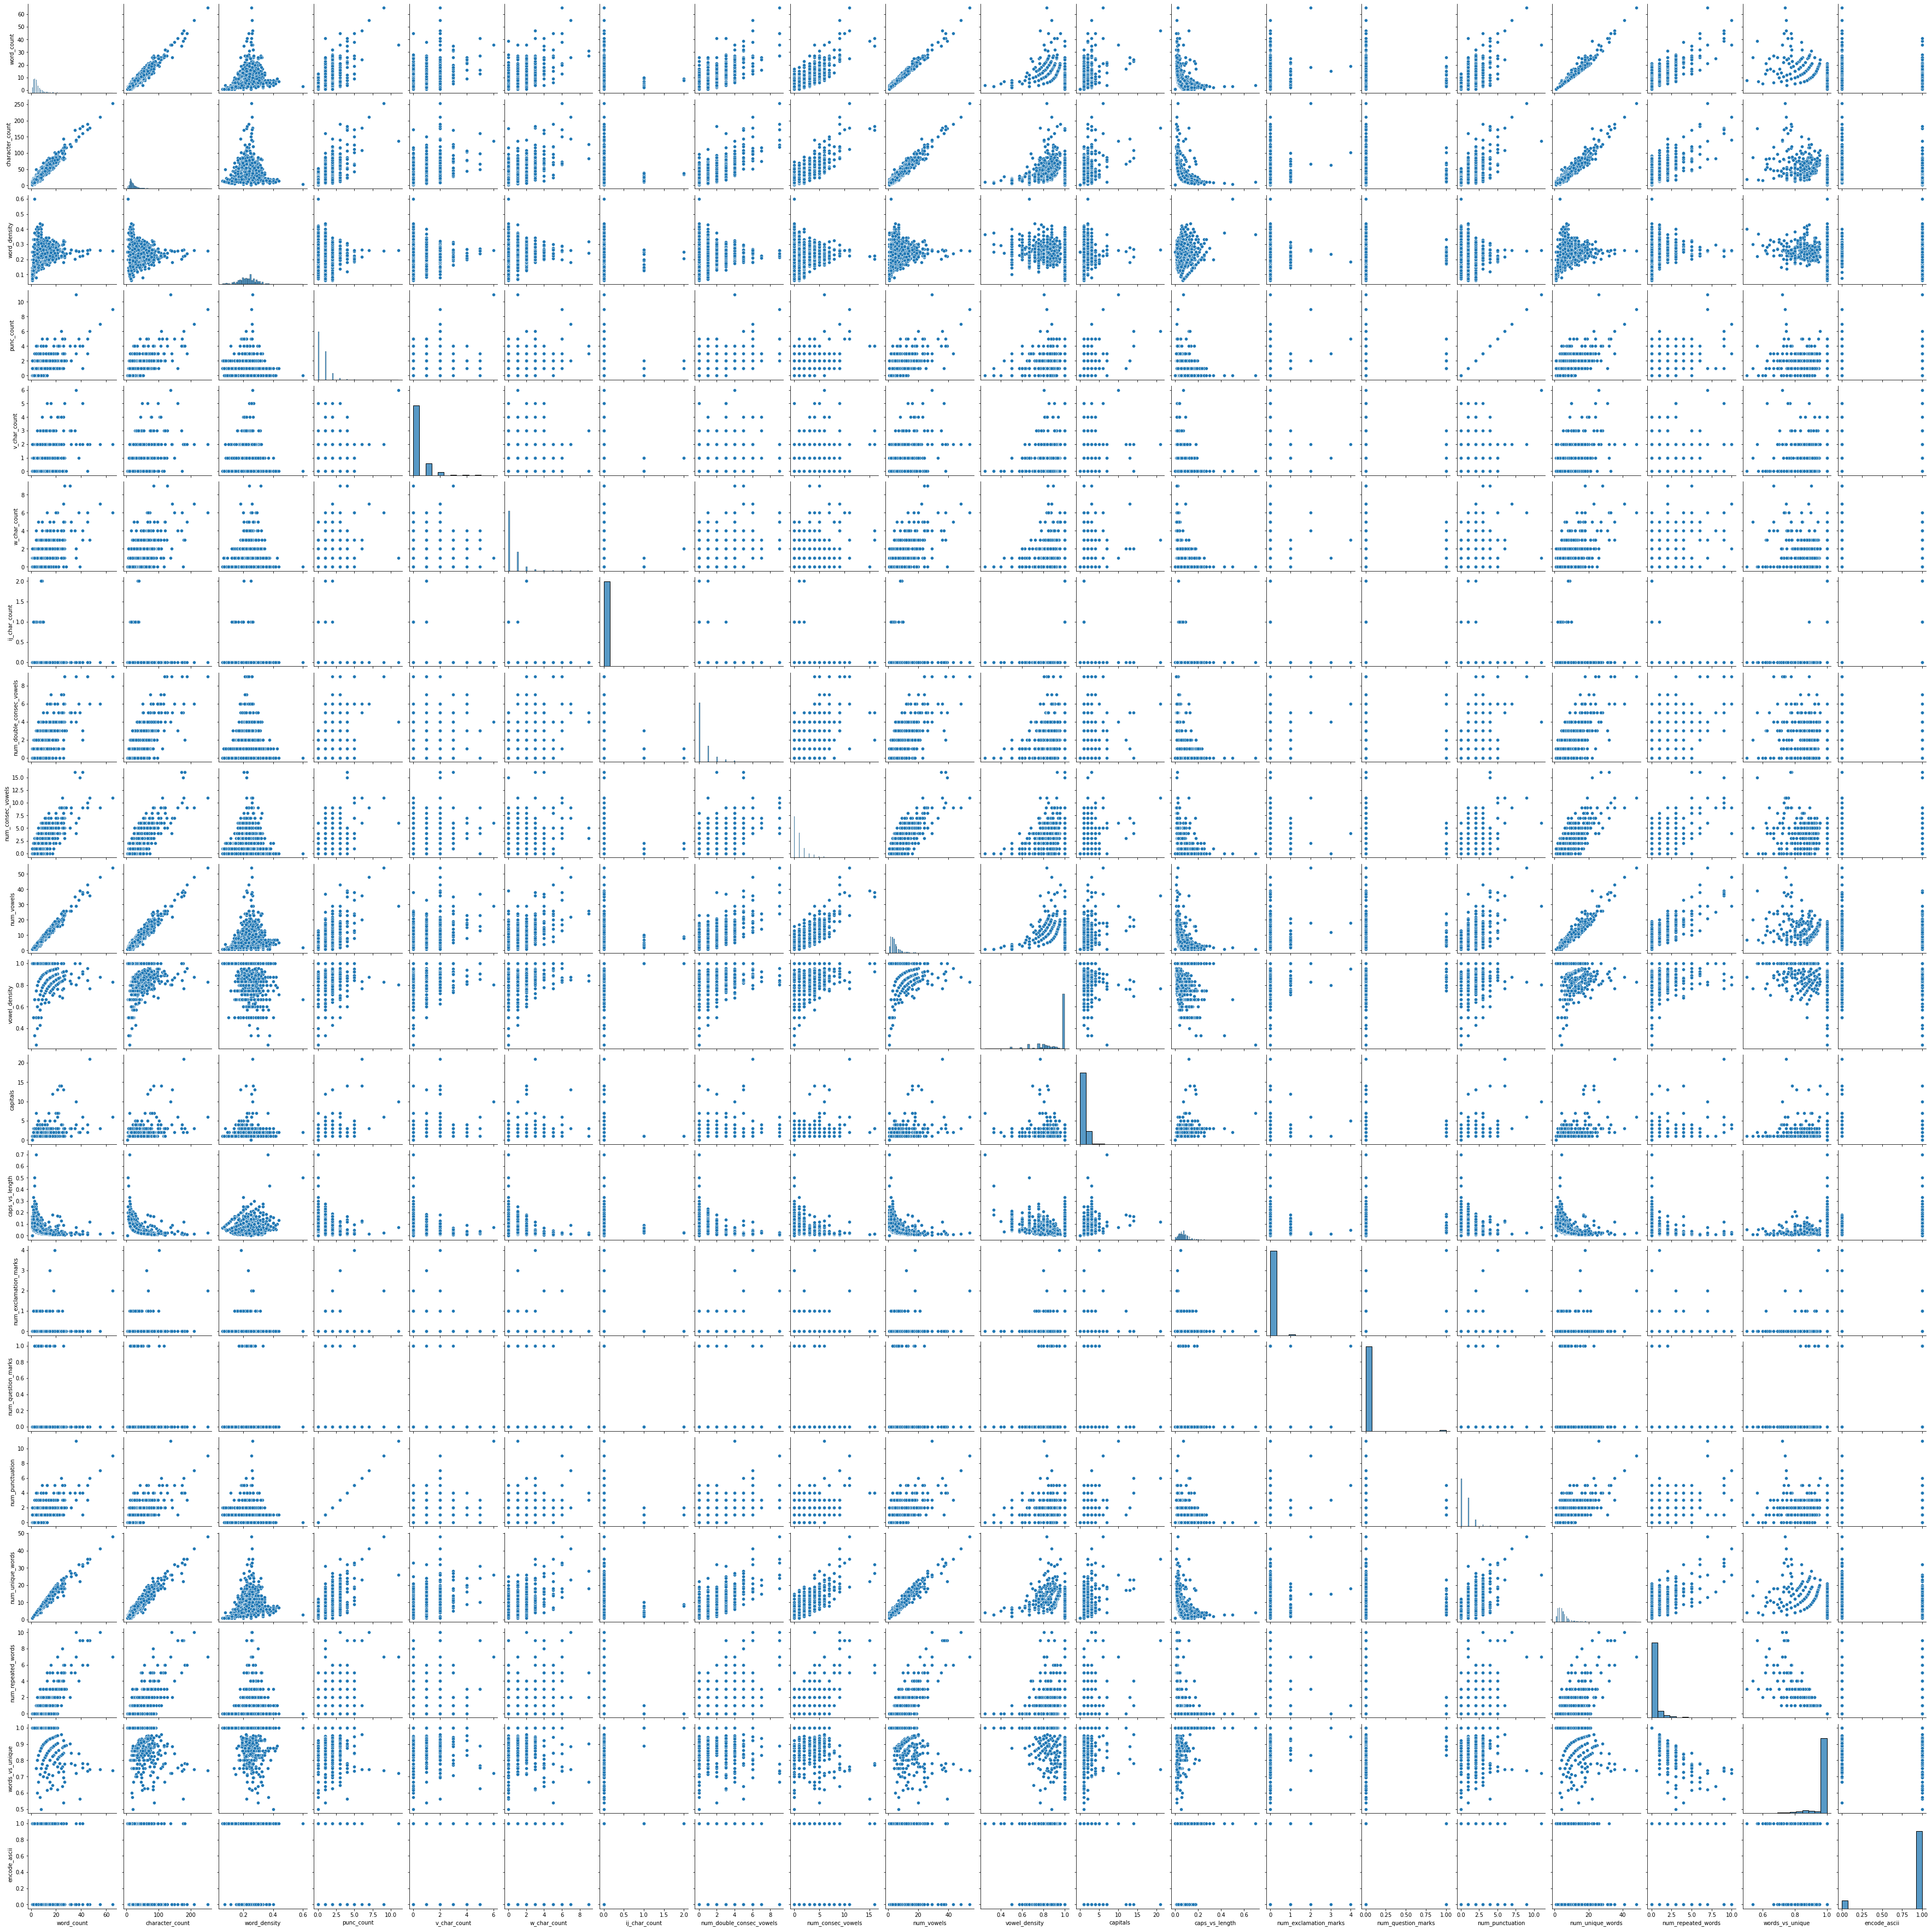

In [19]:
df.corr(method ='pearson')

sns.pairplot(df)


In [20]:
feature_col = list(df.columns)[2:]

x = df[feature_col]
y = df[['language']]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 0)

In [23]:
from sklearn.decomposition import PCA # Principal component analysis used to reduce the number of features in a model
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [25]:
pca = PCA(.95)
pca.fit(x_train)

print('Number of Principal Components = '+str(pca.n_components_))
# Number of Principal Components = 13

x_train = pca.transform(x_train)
x_test = pca.transform(x_test)

Number of Principal Components = 13


In [29]:
from sklearn.tree import DecisionTreeClassifier
import pickle

dt_clf = DecisionTreeClassifier() # Create Decision Tree classifer object
dt_clf = dt_clf.fit(x_train,y_train) # Fit/Train Decision Tree Classifer on training set

# Save model to file in the current working directory so that it can be imported and used.
# I use the pickle library to save the parameters of the trained model
pkl_file = "decision_tree_model.pkl"
with open(pkl_file, 'wb') as file:
    pickle.dump(dt_clf, file)

# Load previously trained model from pickle file
with open(pkl_file, 'rb') as file:
    dt_clf = pickle.load(file)

dt_clf # parameters of the Decision Tree model are shown below and can be further optimized to improve model performance

y_pred = dt_clf.predict(x_test) #Predict the response for test dataset

In [30]:
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
sns.set(style="ticks")
import matplotlib.pyplot as plt

[Text(0, 0.5, 'English'),
 Text(0, 1.5, 'Afrikaans'),
 Text(0, 2.5, 'Nederlands')]

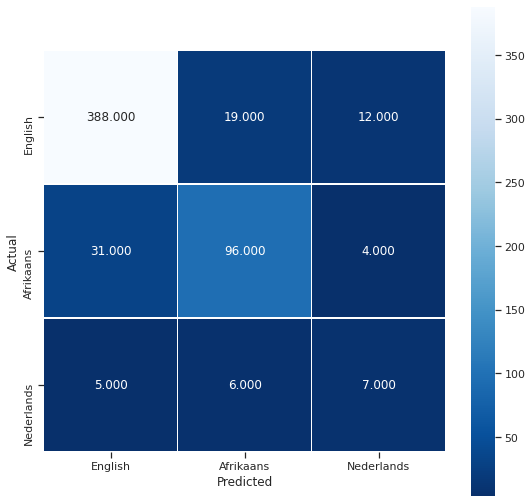

In [35]:
labels = ['English' , 'Afrikaans', 'Nederlands']
# Confusion Matrix
cm_Model_dt = confusion_matrix(y_test, y_pred, labels)
fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111)
sns.heatmap(cm_Model_dt, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual')
plt.xlabel('Predicted')
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
